<a href="https://colab.research.google.com/github/Laura9704/2025_-Analisis/blob/main/ANALISIS_UNIVARIADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
sns.set_theme(style="whitegrid")

#llamado de la informacion
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')

Mounted at /content/drive


**INTRODUCCION**

El presente trabajo se enfoca en detallar los pasos del analisis univariado a la informacion de la base del 2021 BRFSS Dataset from CDC;es el Sistema de Vigilancia de Factores de Riesgo Conductual (BRFSS) el cual es el principal sistema de encuestas telefónicas relacionadas con la salud donde se recopila datos estatales sobre los residentes de EE. UU en base a estilos de vida y salud, esta base consta con 19 caracteristicas para analisis de las cuales 7 son numericas y 12 son categoricas.Por ello este análisis univariado, se busca explorar y comprender las características fundamentales del conjunto de datos, como es la distribución, la tendencia central, la dispersión y los posibles patrones presentes en los datos antes de realizar análisis más complejos.

Para llevar a cabo este análisis, se ha realizado una cuidadosa selección de variables,en base a estudios previos que modelan riesgo de enfermadades cardicas o cardiovasculares. tomando en cuenta su relevancia en el contexto del estudio. Las variables seleccionadas son:

*   Elemento de lista
*   Elemento de lista


**SELECCIÓN DE LA VARIABLE**

Para la seleccion de la variable se prosiguen los siguientes pasos de analisis en los datos de la base llamada CVD_cleaned.csv, la cual consiste en reconocimiento del tamano de la informacion la cual consta de 19 columnas o etiquetas con 308854 registros, de los cuales hay informacion categorica y numerica, a continuacion se anexala informacion de las batos en la base







In [2]:
print("Información del conjunto de datos:\n")
data.info()

Información del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(


*   **Variables Categoricas**:son aquellas que toman un número limitado de categorías o grupos. Estas variables no tienen un orden o un valor numérico específico, en la informacion del dataset se encuentran las variables:

 * **General_Health**: Esta variable representa la salud generial de los encuenstados por el BRFFSS, el cual tiene la siguiente distribucion la cual esta desbalanceada en el sentido de que una de las opciones tiene mayor siendo buena salud del 35.8% con respecto a una menor cantidad con pobre/mala con el 3.7% de los registro :

       **Excellent:**  Se registraron 55,954 personas con una excelente salud general, esta representa el  **18.1%**  de los datos        

      **Very Good:**  con 110395 registros de tener una muy buena salud general, representa el **35.8%**.

       **Good:** con         95364 personas tienen una salud buena, con el **30.9%**

       **Fair:** con          35810  regristros para normal(regular) de salud, con el valor del **11.6%**

       **Poor:** con          11331 de tener una salud pobre, con el **3.7%**
  
  esta variable no es muy representativa en el analisis del resgo de una enfermedad cardica, ya que como caracteristica es demasiado general dentro al contexto a analizar, por lo cual no proporciona informacion especifica ni relevante sobre los riesgos cordiovasculares que deben considerarse para evaluar adecuadamente el riesgo de enfermedad cardíaca

 * **Checkup**: esta caracteristica representa la frecuencia de tiempo vs cuanto tiempo ha transcurrido desde que se realiza un cheque o revision medica, la cual tiene como opciones en la revison de la informacion las siguientes

      **Within the past year**: con  239371 registros de una revision dentro del ultimo año, la cual representa un **77.5%** el cual es un alto indice dentro de los datos obtinidos nos preprenta un desbalance en las proporcion de distribucion de los datos para esta caracteristica
      
      **Within the past 2 years**: con     37213 registros para chequeos dentro de los ultimos años representa el **12.1%** de los datos, siendo  una representacion algo significativa para la clasificacion.
      
      **Within the past 5 years**: con    17442 registros de visitas de chequeo al medico dentro de los ultimos 5 años represnta un **5.7%**, de lo cual se puede intrepretar que los encuentados tiene una baja revision de salud
      
      **5 or more years ago**         13421
      
      **Never**                        1407
   
Exercise
Heart_Disease
Skin_Cancer
Other_Cancer
Depression, Diabetes
Arthritis
Sex
Age_Category
Smoking_History

*   **Variables numericas**:on aquellas que toman valores numéricos y pueden ser medidas o cuantificadas. como son las variables  Height_(cm),Weight_(kg), BMI, Alcohol_Consumption, Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption

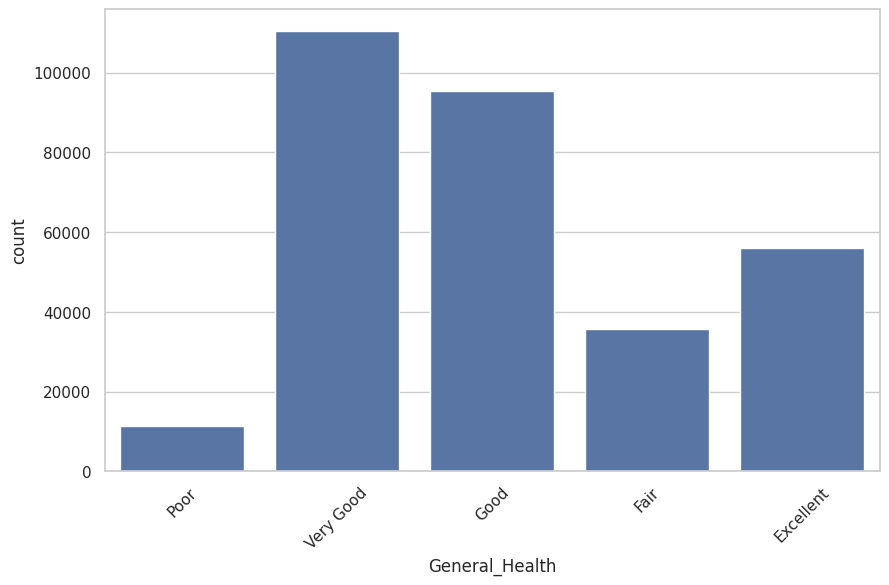

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='General_Health', data=data)
plt.xticks(rotation=45)
plt.show()
